## Clustering Applications


### Customer Segmentation
You can cluster your customers based on their purchases and their activity on your website. this is useful to understand who your customers are and what they need,so you can adapt your products and marketing campaigns to each segment.
For Example, **customer segmentation can be useful in recommender system to suggest content that other users in the same cluster enjoyed**  

### Data Analysis
When you analyze a new dataset, it can be helpful to run clustering algorithms and then analyze each cluster separately

### Dimensionality Reduction

Once a dataset has been clustered, it is usually possible to measure each instance's affinity with each cluster; affinity is any measure of how well an instance fits into a cluster. Each instance's feature **vector x** can then be replaced with the vector of its cluster affinities. If there are **k clusters** then this vector is **k-dimensional**. The new vector is typically much lower-dimensional than the original feature vector, but it can preserve enough information for further processing

### Feature Engineering
The cluster affinities can often be useful as extra features, in this case, we get the similarities between latitude and longitude and with that information the algorithm define the centroids and the distance to them, so we can use this information as extra features to the model, because the centroids means the main groups so if we want to know what state is good to invest and the element is near the centroids it could be a good thing to help to predict

 ![](../Figures/latitudeLongitudeHousingAfinities.png)

### Anomaly Detection

Any Instance that has a low affinitive to all the cliusters is likely to be an anomaly. For Example if you have clustered the users of your website based on their behaviour, you can detect users with unusual behaviour , such as an unusual number of requests per second

### Search Engines

Some Search Engines let you search for images that are similar to a reference image. To build such a system, you would apply a clustering algorithm to all your images in your database: similar images would end up in the same cluster. Then when a user provides a reference image , all you need to do is use the trained clustering model to find this image's cluster and you could simply return all the images from that cluster


# Cluster Algorithms

### Kmeans

[[-2.69823941  1.3454702 ]
 [-2.87459835  1.8097575 ]
 [ 0.96077126  1.17046777]
 ...
 [-2.80303543  2.72948115]
 [ 0.24057359  2.40103109]
 [-2.63807768  1.95621065]]
predictions:  [4 0 1 ... 2 1 0] [4 0 1 ... 2 1 0] True


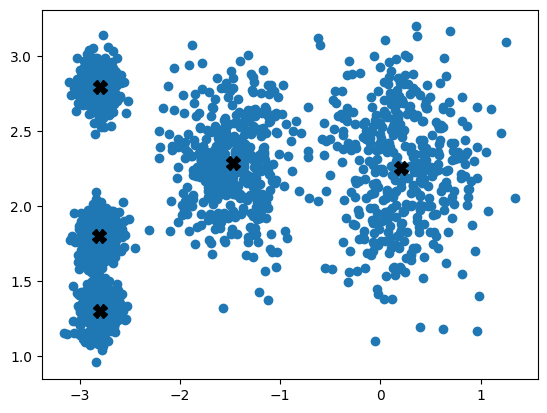

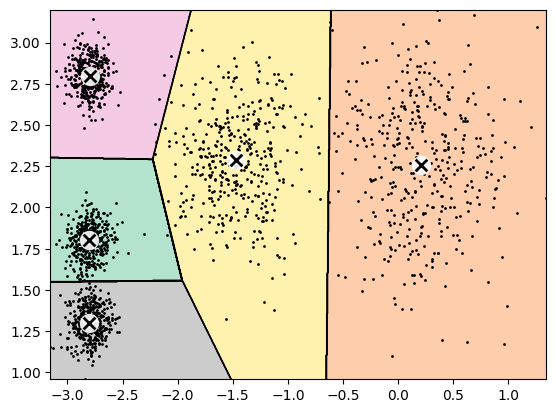

In [1]:
from matplotlib import pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

blob_centers = np.array([[ 0.2,  2.3], [-1.5 ,  2.3], [-2.8,  1.8],
                         [-2.8,  2.8], [-2.8,  1.3]])
blob_std = np.array([0.4, 0.3, 0.1, 0.1, 0.1])
x, y = make_blobs(n_samples=2000, centers=blob_centers, cluster_std=blob_std,
                  random_state=7)

print(x)

k = 5
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
y_pred = kmeans.fit_predict(x)
centroids = kmeans.cluster_centers_
plt.scatter(x[:, 0], x[:, 1])

print('predictions: ', y_pred, kmeans.labels_, y_pred is kmeans.labels_)

plt.plot(kmeans.cluster_centers_[:, 0],kmeans.cluster_centers_[:, 1],
             linestyle="", color="black", marker="X", markersize=10,
             label="Cluster centers")
plt.show()
x_min = x.min(axis=0)
x_max = x.max(axis=0)
xx, yy = np.meshgrid(np.linspace(x_min[0], x_max[0], 1000),
                         np.linspace(x_min[1], x_max[1], 1000))

Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(Z, extent=(x_min[0], x_max[0], x_min[1], x_max[1]),
                cmap="Pastel2")
plt.contour(Z, extent=(x_min[0], x_max[0], x_min[1], x_max[1]),
                linewidths=1, colors='k')
plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=35, linewidths=8,
                color='w', zorder=10, alpha=0.9)
plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=2, linewidths=12,
                color='k', zorder=11, alpha=1)
plt.plot(x[:, 0], x[:, 1], 'k.', markersize=2)
plt.show()

In [4]:
x_new = np.array([[0,2], [3, 2], [-3, 3], [-3,2.5]])
kmeans.predict(x_new)

array([1, 1, 2, 2])

In [5]:
# we can get the affinity or distance to the centroids with transform method from  kmeans
kmeans.transform(x)

array([[0.46779778, 3.04611916, 1.45402521, 1.54944305, 0.11146795],
       [0.07122059, 3.11541584, 0.99002955, 1.48612753, 0.51431557],
       [3.81713488, 1.32016676, 4.09069201, 2.67154781, 3.76340605],
       ...,
       [0.92830156, 3.04886464, 0.06769209, 1.40795651, 1.42865797],
       [3.10300136, 0.14895409, 3.05913478, 1.71125   , 3.23385668],
       [0.22700281, 2.8625311 , 0.85434589, 1.21678483, 0.67518173]])

## How Kmeans works??
First we need to define the number of clusters, then the algorithm randomly selects k instances from the dataset and uses them as the initial centroids. Then it assigns each instance to the closest centroid, then it creates a new centroid by taking the mean of all the instances that were assigned to each centroid. Then it assigns each instance to the new closest centroid, and so on until the centroids stop moving. The algorithm stops when the centroids stop moving, or when it has reached the maximum number of iterations (defined by the n_iter hyperparameter, which defaults to 300).

in This Web We can see how it works with more detail [towardsdatascience.com/k-means-clustering](https://towardsdatascience.com/k-means-clustering-from-a-to-z-f6242a314e9a)

### Centroids Initialization Methods
If you know where the centroids should be , you can set it with the init hyperparameter

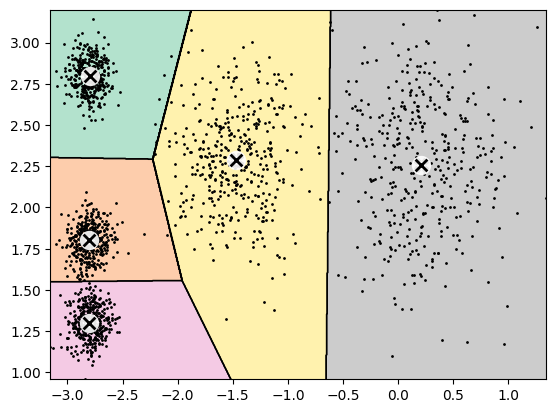

In [6]:
good_init = np.array([[-3, 3], [-3, 2], [-3, 1], [-1, 2], [0, 2]])
kmeans = KMeans(n_clusters=5, init=good_init, n_init=1, random_state=42)
kmeans.fit(x)
y_pred = kmeans.fit_predict(x)
centroids = kmeans.cluster_centers_
plt.scatter(x[:, 0], x[:, 1])

plt.plot(kmeans.cluster_centers_[:, 0],kmeans.cluster_centers_[:, 1],
             linestyle="", color="black", marker="X", markersize=10,
             label="Cluster centers")

x_min = x.min(axis=0)
x_max = x.max(axis=0)
xx, yy = np.meshgrid(np.linspace(x_min[0], x_max[0], 1000),
                         np.linspace(x_min[1], x_max[1], 1000))

Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(Z, extent=(x_min[0], x_max[0], x_min[1], x_max[1]),
                cmap="Pastel2")
plt.contour(Z, extent=(x_min[0], x_max[0], x_min[1], x_max[1]),
                linewidths=1, colors='k')
plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=35, linewidths=8,
                color='w', zorder=10, alpha=0.9)
plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=2, linewidths=12,
                color='k', zorder=11, alpha=1)
plt.plot(x[:, 0], x[:, 1], 'k.', markersize=2)
plt.show()


#### Another solution is to run the algorithm multiple times with different random initializations, and select the solution that minimizes the inertia. This is controlled by the n_init hyperparameter (default is 10). The following code runs the K-Means algorithm 10 times with different random initializations, and selects the best solution (the one with the lowest inertia which is the sum of the squared distances between each instance and its closest centroid):

In [7]:
# you can access to the inertia with inertia_ attribute
kmeans.inertia_

211.59853725816836

#### Kmeans++ initialization method is the default initialization method in scikit-learn. It tries to select centroids that are as far apart as possible. This generally leads to better solutions than the random initialization method. However, it’s important to set the n_init hyperparameter to a reasonable value, because the default value is 10, which may not be enough. In this case, the default value is fine, but if you increase k, you may want to increase n_init as well.

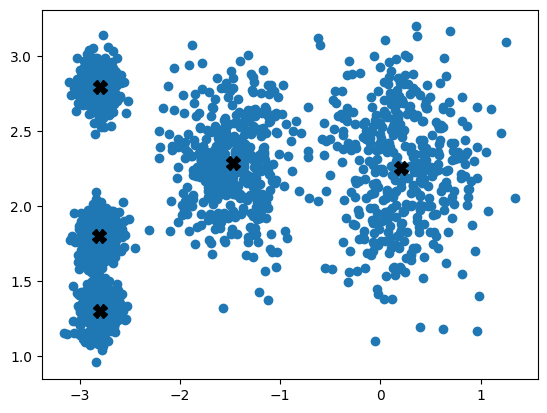

In [8]:
kmeans = KMeans(n_clusters=5, init="k-means++", n_init=10, random_state=42)
kmeans.fit(x)

centroids = kmeans.cluster_centers_
plt.scatter(x[:, 0], x[:, 1])
plt.plot(kmeans.cluster_centers_[:, 0],kmeans.cluster_centers_[:, 1],
             linestyle="", color="black", marker="X", markersize=10,
             label="Cluster centers")

#### Aceelerated Kmeans with MiniBatchKMeans class ,we can use it when the dataset is too large with many clusters, so we can use it to accelerate the algorithm avoiding many unnecessary calculations

C:\Users\rbblazquez\AppData\Roaming\Python\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


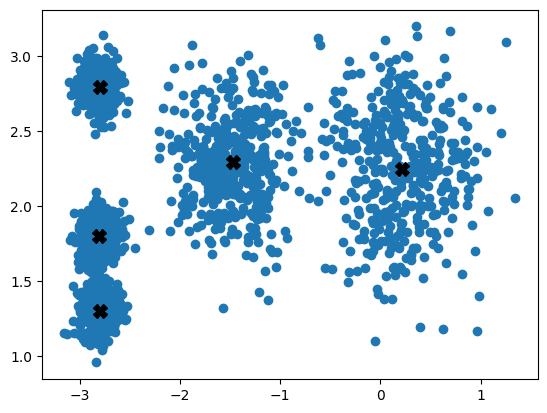

In [9]:
from sklearn.cluster import MiniBatchKMeans
minibatch_kmeans = MiniBatchKMeans(n_clusters=5, random_state=42)
minibatch_kmeans.fit(x)

plt.scatter(x[:, 0], x[:, 1])
plt.plot(minibatch_kmeans.cluster_centers_[:, 0],minibatch_kmeans.cluster_centers_[:, 1],
             linestyle="", color="black", marker="X", markersize=10,
             label="Cluster centers")

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100


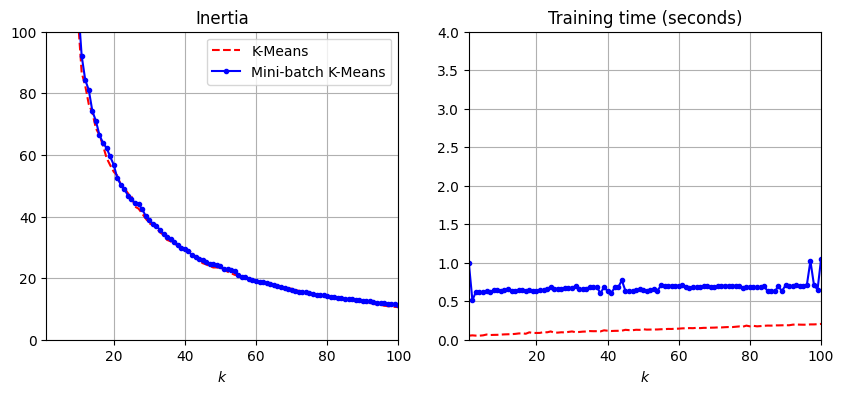

In [13]:
from timeit import timeit

max_k = 100
times = np.empty((max_k, 2))
inertias = np.empty((max_k, 2))
for k in range(1, max_k + 1):
    kmeans_ = KMeans(n_clusters=k, algorithm="lloyd", random_state=42, n_init='auto')
    minibatch_kmeans = MiniBatchKMeans(n_clusters=k, random_state=42, n_init='auto')

    times[k - 1, 0] = timeit("kmeans_.fit(x)", number=10, globals=globals())
    times[k - 1, 1] = timeit("minibatch_kmeans.fit(x)", number=10,globals=globals())

    inertias[k - 1, 0] = kmeans_.inertia_
    inertias[k - 1, 1] = minibatch_kmeans.inertia_
    print(k)

plt.figure(figsize=(10, 4))

plt.subplot(121)
plt.plot(range(1, max_k + 1), inertias[:, 0], "r--", label="K-Means")
plt.plot(range(1, max_k + 1), inertias[:, 1], "b.-", label="Mini-batch K-Means")
plt.xlabel("$k$")
plt.title("Inertia")
plt.legend()
plt.axis([1, max_k, 0, 100])
plt.grid()

plt.subplot(122)
plt.plot(range(1, max_k + 1), times[:, 0], "r--", label="K-Means")
plt.plot(range(1, max_k + 1), times[:, 1], "b.-", label="Mini-batch K-Means")
plt.xlabel("$k$")
plt.title("Training time (seconds)")
plt.axis([1, max_k, 0, 4])
plt.grid()

plt.show()

### Finding the optimal number of clusters,
 ##### you must be thinking that you could just pick the model with the lowest inertia, right? Well, not necessarily. The inertia is not a good performance measure for clustering, because it keeps getting lower as you increase k. This is because the inertia is defined as the sum of the squared distances between each training instance and its closest centroid. So, naturally, the inertia will always go down when you increase k, since each instance gets closer to its own centroid (since centroids are located at the center of each cluster).So, if you increase k enough, each instance will end up in its own cluster, at which point the inertia will be zero, but this would not be a very useful model, since it would predict one cluster per instance, which is not very useful for making predictions. So, you should select the model that makes the tradeoff between inertia and k, that is, the elbow of the inertia curve.


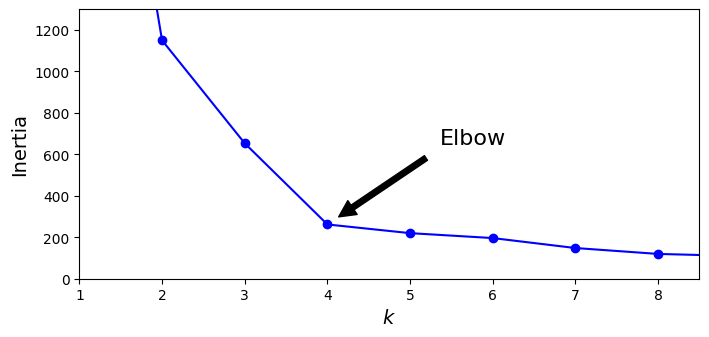

In [15]:
# elbow method
kmeans_per_k = [KMeans(n_clusters=k, random_state=42, n_init='auto').fit(x)
                for k in range(1, 10)]
inertias = [model.inertia_ for model in kmeans_per_k]

plt.figure(figsize=(8, 3.5))
plt.plot(range(1, 10), inertias, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)
plt.annotate('Elbow',
             xy=(4, inertias[3]),
             xytext=(0.55, 0.55),
             textcoords='figure fraction',
             fontsize=16,
             arrowprops=dict(facecolor='black', shrink=0.1)
            )
plt.axis([1, 8.5, 0, 1300])
plt.show()


#### Silhouette score
##### The silhouette score is the mean silhouette coefficient over all the instances. The silhouette coefficient can vary between -1 and 1.
* A coefficient close to 1 means that the instance is well inside its own cluster and far from other clusters
*  close to 0 means that the instance is close to the decision boundary between two neighboring clusters.
*  close to -1 means that the instance may have been assigned to the wrong cluster. The silhouette score is simply the mean of all silhouette coefficients. The following code computes the silhouette score for the k-means model with k = 4:

In [16]:
from sklearn.metrics import silhouette_score

score = silhouette_score(x, kmeans.labels_)
score

0.655517642572828

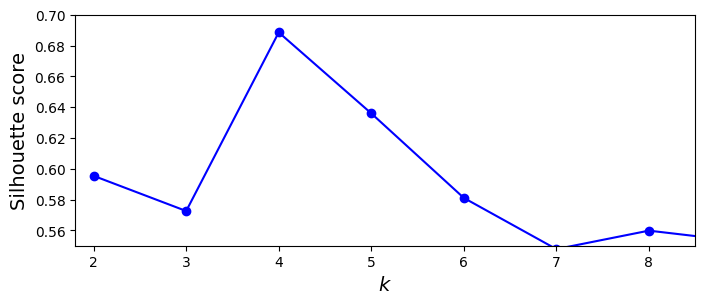

In [17]:
kmeans_per_k = [KMeans(n_clusters=k, random_state=42, n_init='auto').fit(x)
                for k in range(2, 10)]
silhouette_scores = [silhouette_score(x, model.labels_)
                     for model in kmeans_per_k]

plt.figure(figsize=(8, 3))
plt.plot(range(2, 10), silhouette_scores, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
plt.axis([1.8, 8.5, 0.55, 0.7])
plt.show()

## as we can see, 4 clusters is a very good choice

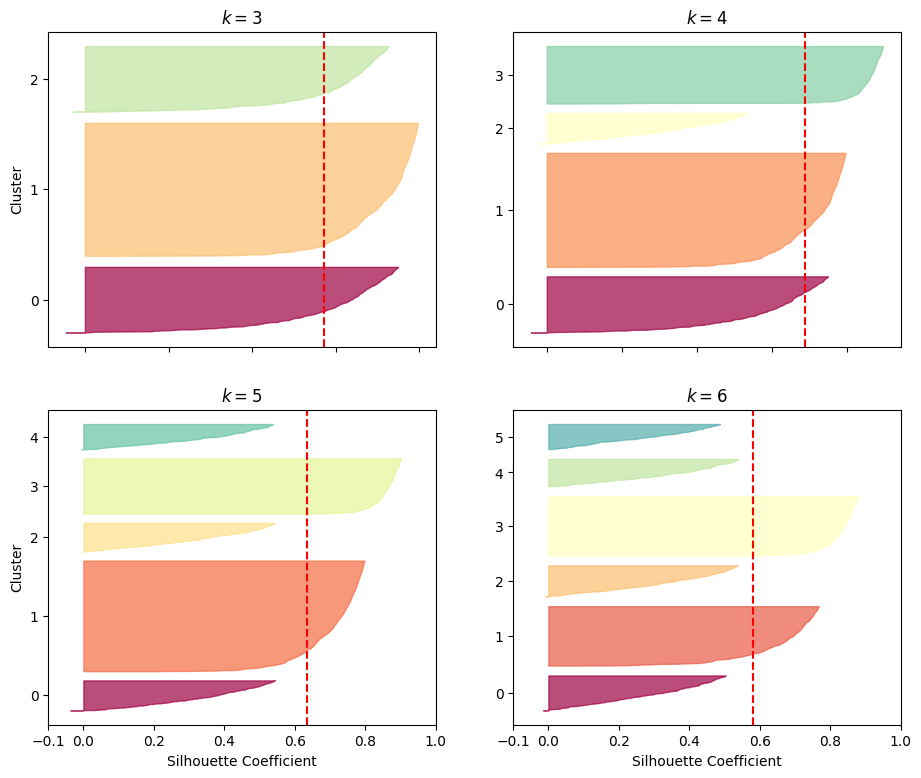

In [20]:

from sklearn.metrics import silhouette_samples
from matplotlib.ticker import FixedLocator, FixedFormatter

plt.figure(figsize=(11, 9))

for k in (3, 4, 5, 6):
    plt.subplot(2, 2, k - 2)

    y_pred = kmeans_per_k[k - 1].labels_
    silhouette_coefficients = silhouette_samples(x, y_pred)

    padding = len(x) // 30
    pos = padding
    ticks = []
    for i in range(k):
        coeffs = silhouette_coefficients[y_pred == i]
        coeffs.sort()

        color = plt.cm.Spectral(i / k)
        plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs,
                          facecolor=color, edgecolor=color, alpha=0.7)
        ticks.append(pos + len(coeffs) // 2)
        pos += len(coeffs) + padding

    plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
    plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))
    if k in (3, 5):
        plt.ylabel("Cluster")

    if k in (5, 6):
        plt.gca().set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
        plt.xlabel("Silhouette Coefficient")
    else:
        plt.tick_params(labelbottom=False)

    plt.axvline(x=silhouette_scores[k - 2], color="red", linestyle="--")
    plt.title(f"$k={k}$")

plt.show()
